### Goal: Get data from avg_distance_data/ and 1) find swarms that have average (over all bees) distance from queen  <0.1 and 2) the time step when those swarms reaches this plateau.

In [1]:
# Imports
import json
import numpy as np
import plotly.plotly as py
import matplotlib as mpl
from matplotlib import cycler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import os
import glob2
import re
import pandas as pd

In [2]:
# # Try on this data of 2 Replicates
# with open("avg_distance_data/Q0.15_W0.1_D0.1_T0.5_wb3.json", "r") as f:
#     data = json.load(f)

In [2]:
# len(data), len(data[0])

Iterate over each of the 10 replicates. Find time step (index) of the first instance of the min value of data[replicate_i]

In [3]:
def get_all_reps_mins(json_file):
    
    with open("avg_distance_data/{}".format(json_file), "r") as f:
        data = json.load(f)
    
    all_reps_mins = []
    for rep_i in range(len(data)):
        # print("Replicate {}:".format(rep_i))
        min_val = np.min(data[rep_i])
        min_i = np.argmin(data[rep_i])
        # print(min_val, min_i)
        min_tuple = (min_val, min_i)
        all_reps_mins.append(min_tuple)

    return all_reps_mins

# get_all_reps_mins("Q0.15_W0.001_D0.25_T0.5_wb1.json")

Check if min_val > 0.03. If so, add to list; if not, replace it with NaN.

In [4]:
def check_min(json_file, max_dist):
    
    all_reps_mins = get_all_reps_mins(json_file)
    
    min_vals = []; min_indices = []
    time_data = {}

    for i, tup in enumerate(all_reps_mins):
        if tup[0] <= max_dist:
            min_vals.append(tup[0])
            min_indices.append(tup[1])
        else: 
            min_vals.append(tup[0])
            min_indices.append(np.nan)

        time_data["min_vals"] = min_vals
        time_data["min_indices"] = min_indices
        
    return time_data

# time_data = check_min("Q0.15_W0.1_D0.55_T0.5_wb1.json", max_dist=0.1)
# time_data

If at least 6/10 of replicates != NaN, get average. Else, NaN for this set of params.

In [5]:
def get_set_avg(json_file, max_dist, success_proportion):
    
    time_data = check_min(json_file, max_dist)
    
    param_set_avg = 0

    count_successes = 0
    # sum(value != np.nan for value in time_data["min_indices"]) 
    for val in time_data["min_indices"]:
        if type(val) != type(np.nan):
            count_successes += 1
    # print("Not NaNs: {}".format(count_successes))
    
    if count_successes > success_proportion:
        param_set_avg = int(round(np.nanmean(time_data["min_indices"])))
    else: param_set_avg = np.nan

    return param_set_avg
    
# get_set_avg("Q0.15_W0.005_D0.25_T0.5_wb1.json", max_dist=0.1, success_proportion=5)

Write this avg value of all 84 sets of params to a json.

In [62]:
# Get all file names:
all_jsons = list(map(lambda x : x.split("/")[-1], glob2.glob("avg_distance_data/*T0.005*.json")))

# Store avgs for all 84 jsons
store_avgs = {}
for j_file in all_jsons:
    store_avgs[j_file[:-5]] = get_set_avg(j_file, max_dist=0.2, success_proportion=5) 

In [63]:
# len(store_avgs), store_avgs

In [64]:
# Four params and their values, each is a np array
queen_bee_concentrations = [0.15]
print("Q = {}".format(queen_bee_concentrations))

worker_bee_concentrations = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
print("W = {}".format(worker_bee_concentrations))

diffusion_coefficients = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
print("D = {}".format(diffusion_coefficients))

worker_bee_thresholds = [0.005, 0.5]
print("T = {}".format(worker_bee_thresholds))


Q = [0.15]
W = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
D = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
T = [0.005, 0.5]


In [65]:
def all_W_1_D(D_val):
    # For 1 D vs. all W values
    avgs_list = []
    for param_set in store_avgs:
        if "D{}".format(D_val) in param_set:
            avgs = store_avgs[param_set]
            print(param_set)
            print(avgs)
            avgs_list.append(avgs)

    return avgs_list

# all_W_1_D(D_val=0.25)

In [66]:
data = {}
for i, d in enumerate(diffusion_coefficients):
    all_W = all_W_1_D(d)
    data[d] = all_W

# data

Q0.15_W0.0005_D0.005_T0.0050_wb1
nan
Q0.15_W0.0010_D0.005_T0.0050_wb1
nan
Q0.15_W0.0050_D0.005_T0.0050_wb1
nan
Q0.15_W0.0100_D0.005_T0.0050_wb1
nan
Q0.15_W0.0500_D0.005_T0.0050_wb1
nan
Q0.15_W0.1000_D0.005_T0.0050_wb1
nan
Q0.15_W0.5000_D0.005_T0.0050_wb1
nan
Q0.15_W0.0005_D0.010_T0.0050_wb1
nan
Q0.15_W0.0010_D0.010_T0.0050_wb1
nan
Q0.15_W0.0050_D0.010_T0.0050_wb1
nan
Q0.15_W0.0100_D0.010_T0.0050_wb1
nan
Q0.15_W0.0500_D0.010_T0.0050_wb1
nan
Q0.15_W0.1000_D0.010_T0.0050_wb1
nan
Q0.15_W0.5000_D0.010_T0.0050_wb1
nan
Q0.15_W0.0005_D0.050_T0.0050_wb1
298
Q0.15_W0.0010_D0.050_T0.0050_wb1
309
Q0.15_W0.0050_D0.050_T0.0050_wb1
312
Q0.15_W0.0100_D0.050_T0.0050_wb1
314
Q0.15_W0.0500_D0.050_T0.0050_wb1
314
Q0.15_W0.1000_D0.050_T0.0050_wb1
314
Q0.15_W0.5000_D0.050_T0.0050_wb1
315
Q0.15_W0.0005_D0.100_T0.0050_wb1
281
Q0.15_W0.0010_D0.100_T0.0050_wb1
289
Q0.15_W0.0050_D0.100_T0.0050_wb1
295
Q0.15_W0.0100_D0.100_T0.0050_wb1
304
Q0.15_W0.0500_D0.100_T0.0050_wb1
310
Q0.15_W0.1000_D0.100_T0.0050_wb1
311
Q

In [67]:
df = pd.DataFrame(data, index=worker_bee_concentrations)
df

,0.005,0.01,0.05,0.1,0.5,1.0
0.0005,NaN,NaN,298,281,230.0,213.0
0.0010,NaN,NaN,309,289,198.0,167.0
0.0050,NaN,NaN,312,295,197.0,180.0
0.0100,NaN,NaN,314,304,257.0,180.0
0.0500,NaN,NaN,314,310,297.0,228.0
0.1000,NaN,NaN,314,311,314.0,301.0
0.5000,NaN,NaN,315,318,NaN,NaN


In [68]:
df2 = df.fillna(0)

In [69]:
df2 = df2.astype(np.int)

In [70]:
df2

,0.005,0.01,0.05,0.1,0.5,1.0
0.0005,0,0,298,281,230,213
0.0010,0,0,309,289,198,167
0.0050,0,0,312,295,197,180
0.0100,0,0,314,304,257,180
0.0500,0,0,314,310,297,228
0.1000,0,0,314,311,314,301
0.5000,0,0,315,318,0,0


In [71]:
df2.values

array([[  0,   0, 298, 281, 230, 213],
       [  0,   0, 309, 289, 198, 167],
       [  0,   0, 312, 295, 197, 180],
       [  0,   0, 314, 304, 257, 180],
       [  0,   0, 314, 310, 297, 228],
       [  0,   0, 314, 311, 314, 301],
       [  0,   0, 315, 318,   0,   0]])

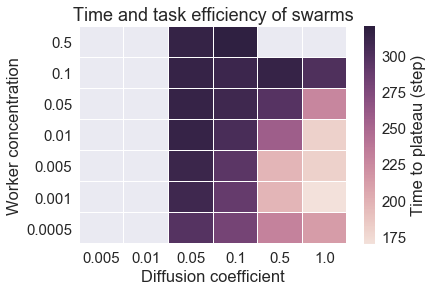

In [72]:
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.set(font_scale = 1.5)

mask = df.isnull()
ax = sns.heatmap(df2, mask=mask, linewidths=.1,
                 cmap=cmap, annot=False, fmt="d", annot_kws={"size": 13},
                 cbar_kws={'label': 'Time to plateau (step)'},
                 vmin=170, vmax=320)
ax.invert_yaxis()
ax.set_xlabel("Diffusion coefficient")
ax.set_ylabel("Worker concentration")
ax.set_title('Time and task efficiency of swarms')
plt.savefig('/Users/dieumynguyen/Desktop/Projects/bee_communication/figures/time_efficiency/Threshold0.005_time_efficiency.pdf', bbox_inches='tight') 